In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure, morphology
%matplotlib inline

In [55]:
img = cv2.imread('IRimage/o1.JPG',cv2.IMREAD_GRAYSCALE)
img.shape

(788, 984)

Text(0.5, 1.0, 'RGB image')

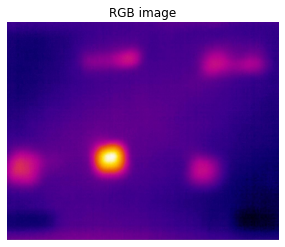

In [45]:
imgc = cv2.imread('IRimage/o1.JPG')
def imgconvert(img):
    b,g,r=cv2.split(img)
    img=cv2.merge((r,g,b))
    return img
imgc=imgconvert(imgc)
plt.imshow(imgc)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'Raw image')

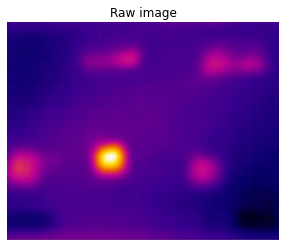

In [46]:
plt.imshow(imgc,cmap="gray")
plt.axis('off')
plt.title('Raw image')

### preprocess method

- 滤波的在数字信号处理这门课程中的本义是，对各种数字信号中的某一或指定频率进行过滤（也可以理解为不想要的频率），最后筛选出我们想要的频率的信号，这即是滤波的过程,也是目的。我们常见的拍摄的图像中或多或少存在一些噪声，常见的图像噪声如高斯噪声、瑞利噪声、椒盐噪声等。这些噪声体现在图像上也就是一些像素值不合理像素（何为不合理，可以简单的理解为过大或者过小的像素，类似白点，黑点 等等），因此我们要对这些不合理的像素进行滤波，常见滤波操作有均值滤波、中值滤波、高斯滤波和双边滤波等。
- 线性滤波:

1. 方框滤波：模糊图像

2. 均值滤波：模糊图像

3. 高斯滤波：信号的平滑处理，去除符合正太分布的噪声

- 非线性滤波

1. 中值滤波：去除椒盐噪声

2. 双边滤波：保边去噪


Text(0.5, 1.0, 'blur')

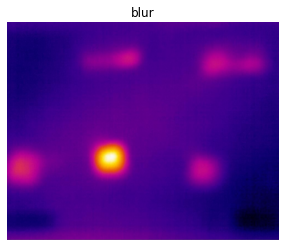

In [47]:
#均值滤波
blur=cv2.blur(imgc,(3,3))
plt.imshow(blur,cmap="gray")
plt.axis('off')
plt.title('blur')

Text(0.5, 1.0, 'Box')

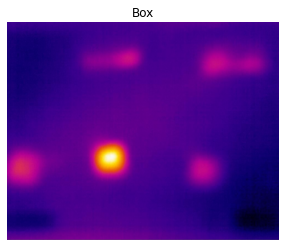

In [48]:
#方框滤波
box=cv2.boxFilter(imgc,-1,(3,3),normalize=True)
plt.imshow(box,cmap="gray")
plt.axis('off')
plt.title('Box')

Text(0.5, 1.0, 'gaussian')

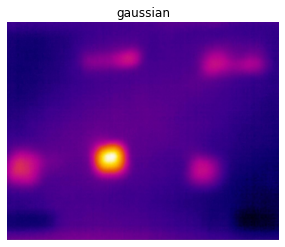

In [49]:
#高斯滤波
gaussian=cv2.GaussianBlur(imgc,(5,5),1)
plt.imshow(gaussian,cmap="gray")
plt.axis('off')
plt.title('gaussian')

Text(0.5, 1.0, 'median')

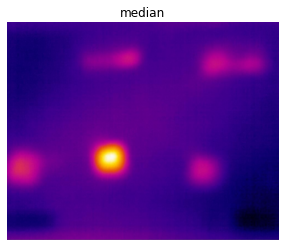

In [50]:
#中值滤波
median=cv2.medianBlur(imgc,5)
plt.imshow(gaussian,cmap="gray")
plt.axis('off')
plt.title('median')

Text(0.5, 1.0, 'median')

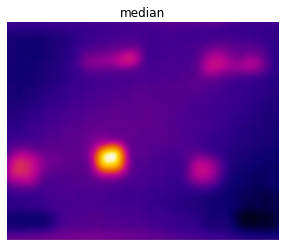

In [51]:
#高斯双边滤波
dst=cv2.bilateralFilter(imgc,15,35,35)
plt.imshow(dst,cmap="gray")
plt.axis('off')
plt.title('median')

Text(0.5, 1.0, 'equ')

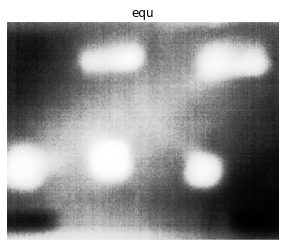

In [60]:
#直方图均衡化
equ = cv2.equalizeHist(img)
plt.imshow(equ,cmap="gray")
plt.axis('off')
plt.title('equ')

(<AxesSubplot:title={'center':'center'}>,
 Text(0.5, 1.0, 'center'))

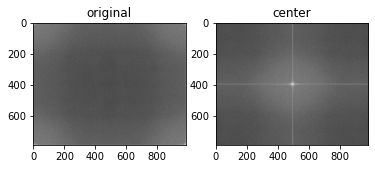

In [62]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')


(<AxesSubplot:title={'center':'center'}>,
 Text(0.5, 1.0, 'center'))

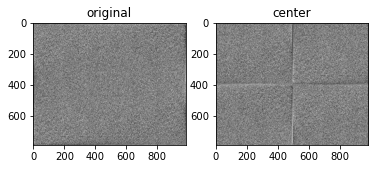

In [20]:
ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

plt.subplot(121),plt.imshow(ph_f,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(ph_fshift,'gray'),plt.title('center')

(<AxesSubplot:title={'center':'img back'}>,
 Text(0.5, 1.0, 'img back'))

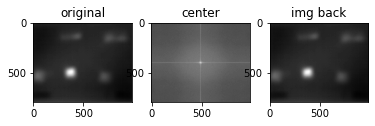

In [64]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('original')
plt.subplot(132),plt.imshow(s1,'gray'),plt.title('center')
# 逆变换
f1shift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
plt.subplot(133),plt.imshow(img_back,'gray'),plt.title('img back')


从中间到外面，频率上依次是从低频到高频的，那么我们如果把中间规定一小部分去掉，是不是相对于把低频信号去掉了呢？

高通滤波器有利于提取图像的轮廓，图像的轮廓或者边缘或者一些噪声处，灰度变化剧烈，那么在把它们经过傅里叶变换后，就会变成高频信号（我们知道高频时捕捉细节的），所以在把图像低频信号滤掉以后剩下的自然就是轮廓了。

(([], []), ([], []))

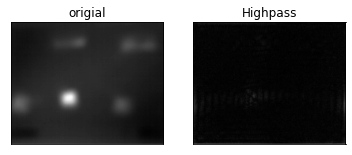

In [66]:
#高通滤波器

img_man = cv2.imread('IRimage/o1.JPG',0)
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[int(rows/2-10):int(rows/2+10),int(cols/2-10):int(cols/2+10)] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])


/var/folders/m1/ws2562m105bdpyh7s345x7cw0000gn/T/ipykernel_9414/3350058397.py:4: RuntimeWarning: divide by zero encountered in log
  img = np.log(np.abs(f1shift))


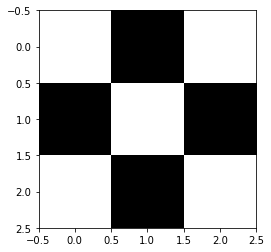

In [35]:
#空间域滤波中的拉普拉斯模板：可以看到，这个模板的频域变换下四周特别亮，也就是是个高通滤波器。其它空间域下的模板都可以转到频域下来看看。
laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])
f = np.fft.fft2(laplacian)
f1shift = np.fft.fftshift(f)
img = np.log(np.abs(f1shift))
plt.imshow(img,'gray')


(([], []), ([], []))

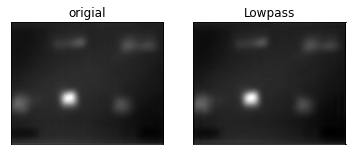

In [73]:
img_man = cv2.imread('IRimage/o1.JPG',0)
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
mask[int(rows/2-20):int(rows/2+20),int(cols/2-20):int(cols/2+20)] = 1
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Lowpass')
plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'equ')

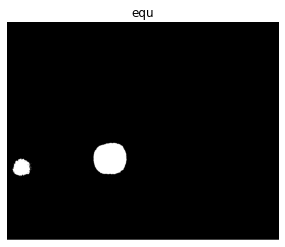

In [71]:
ret2, th2 = cv2.threshold(img_man, 0, 255, cv2.THRESH_OTSU)
plt.imshow(th2,cmap="gray")
plt.axis('off')
plt.title('equ')

In [79]:
img_new.shape

(788, 984)

可以看到低通滤波后图像除了轮廓模糊了外，基本上没什么变化，图像的大部分信息基本上都保持了。从原理上来看，图像的主要信息都集中在低频上，所以低通滤波器的效果是这样也是可以理解的。上述的高通、低通滤波器的构造有0,1构成的理想滤波器，也是最简单的滤波器，还有一些其他的滤波器，比如说高斯滤波器，butterworth滤波器等等，


(([], []), ([], []))

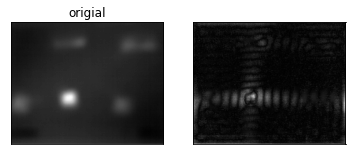

In [41]:
#带通滤波器
mg_man = cv2.imread('IRimage/o1.JPG',0)
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask1 = np.ones(img_man.shape,np.uint8)
mask1[int(rows/2-8):int(rows/2+8),int(cols/2-8):int(cols/2+8)] = 0
mask2 = np.zeros(img_man.shape,np.uint8)
mask2[int(rows/2-80):int(rows/2+80),int(cols/2-80):int(cols/2+80)] = 1
mask = mask1*mask2
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray')
plt.xticks([]),plt.yticks([])

带通的效果，既可以保留一部分低频，也可以保留一部分高频，至于保留多少，怎么保留就视问题的不同而不同了。